In [ ]:
pip install catboost

# **Libiraries**

In [ ]:
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Data Manipulation
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import zscore
from random import seed
from random import randint

#Classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from xgboost.sklearn import XGBClassifier
#from catboost import CatBoostClassifier
import lightgbm as lgb

#Ensabmle Models
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

#Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

#Feature Selection
import statsmodels.api as sm

#Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Data Exploration**

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Segment It ! [PR22] Competition/train.csv").drop('ID', axis = 1)
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Segment It ! [PR22] Competition/test.csv")

train

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,Yes,33,No,Engineer,0.0,Average,2.0,Cat_6,B
1,Female,No,42,Yes,Doctor,5.0,Low,1.0,Cat_6,B
2,Male,Yes,80,No,Executive,0.0,High,2.0,Cat_6,A
3,Female,Yes,66,Yes,Artist,0.0,Average,3.0,Cat_6,C
4,Female,Yes,39,Yes,Healthcare,8.0,High,2.0,Cat_1,D
...,...,...,...,...,...,...,...,...,...,...
7160,Male,Yes,42,Yes,Artist,0.0,Average,5.0,Cat_6,C
7161,Male,Yes,48,Yes,Artist,0.0,Average,2.0,Cat_6,C
7162,Female,Yes,51,Yes,Artist,8.0,Average,2.0,Cat_6,C
7163,Female,Yes,25,No,Engineer,2.0,Low,2.0,Cat_6,A


In [ ]:
train.describe()

,Age,Work_Experience,Family_Size
count,7165.000000,6440.000000,6864.000000
mean,43.623308,2.610559,2.834062
std,16.842847,3.387930,1.538093
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,41.000000,1.000000,2.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


# **Check Null Values**

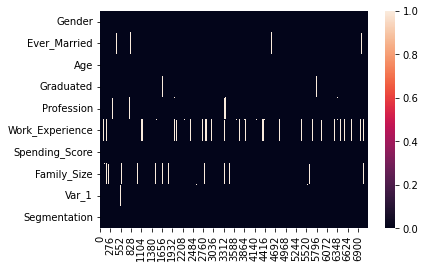

In [ ]:
sns.heatmap(train.isnull().T)

In [ ]:
train.isnull().sum()

Gender               0
Ever_Married       121
Age                  0
Graduated           69
Profession         105
Work_Experience    725
Spending_Score       0
Family_Size        301
Var_1               64
Segmentation         0
dtype: int64

# **Fill Null Values**

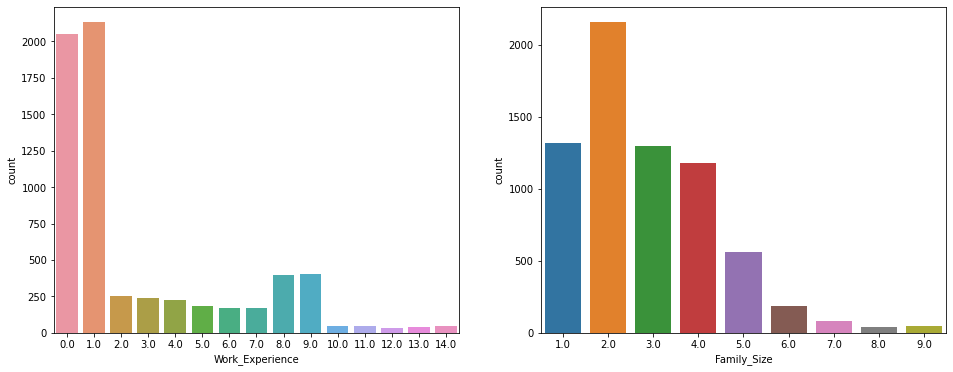

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
sns.countplot(x = 'Work_Experience', data = train, ax = ax[0])
sns.countplot(x = 'Family_Size', data = train, ax = ax[1])

- It is better to fill null values in numerical coulmns with the mode

- Fill categorical coulmns with mode 

In [ ]:
train = train.fillna(train.mode().iloc[0])
test = test.fillna(test.mode().iloc[0])

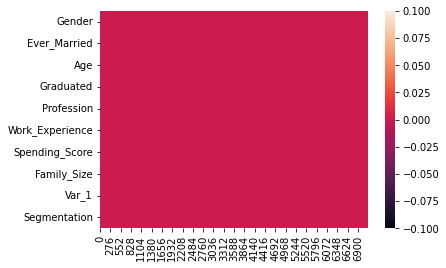

In [ ]:
sns.heatmap(train.isnull().T)

# **Check Duplicates**

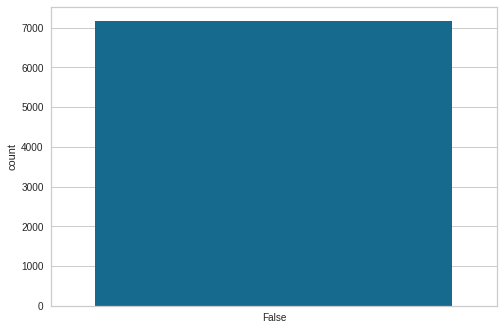

In [ ]:
dup = train.duplicated()
sns.countplot(dup)

There are no Duplicates

# **Data Visualization**

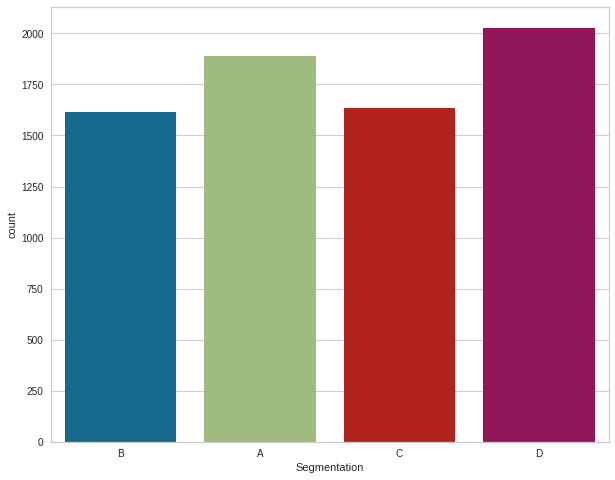

In [ ]:
fig, ax = plt.subplots(figsize = (10,8))
sns.countplot(x = 'Segmentation', data = train, ax = ax)

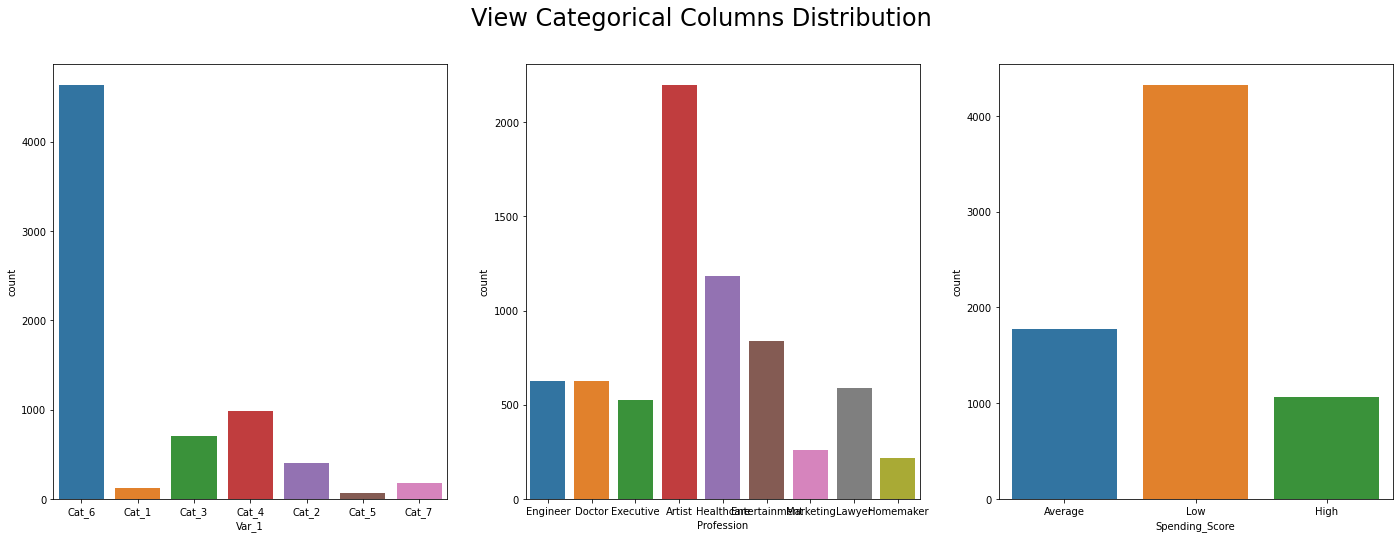

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(24,8))
fig.suptitle('View Categorical Columns Distribution', fontsize = 24)

sns.countplot(x = 'Var_1', data = train, ax = ax[0])
sns.countplot(x = 'Profession', data = train, ax = ax[1])
sns.countplot(x = 'Spending_Score', data = train, ax = ax[2])

- Most of the people work as Artist
- Most of People spend low money
- Most of people in Cat_6

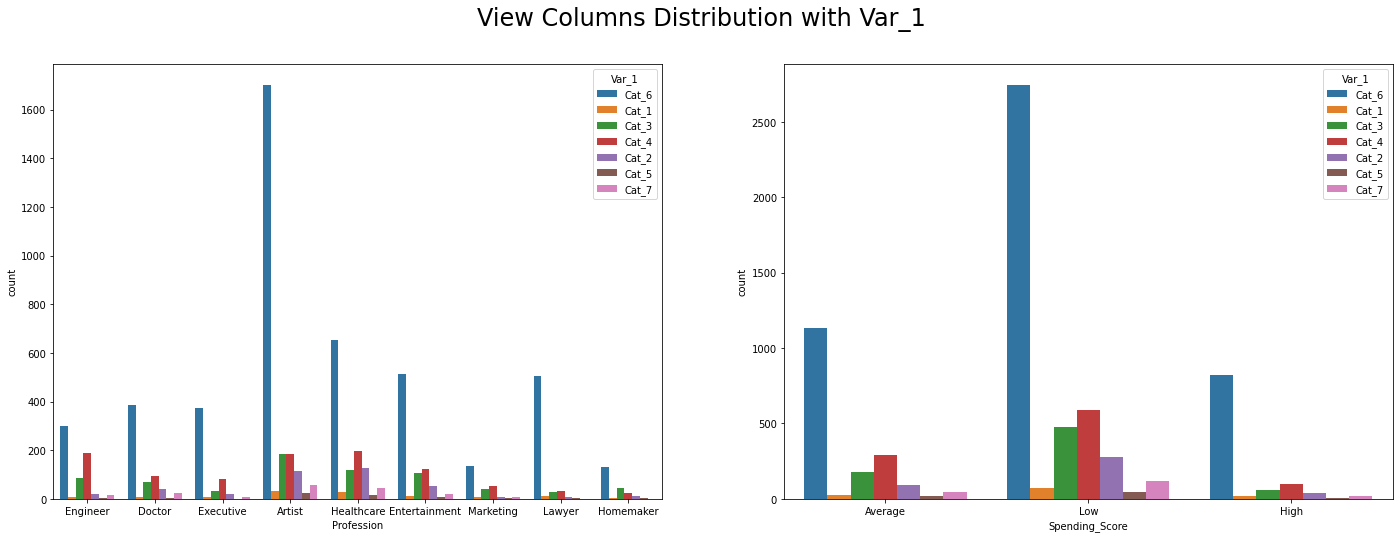

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(24,8))
fig.suptitle('View Columns Distribution with Var_1', fontsize = 24)

sns.countplot(x = 'Profession', hue = 'Var_1', data = train, ax = ax[0])
sns.countplot(x = 'Spending_Score', hue = 'Var_1', data = train, ax = ax[1])

- Most of Profession is from Cat_6
- Most of Spending Score is from Cat_6 

Text(0.5, 1.0, 'Age VS Work_Experience')

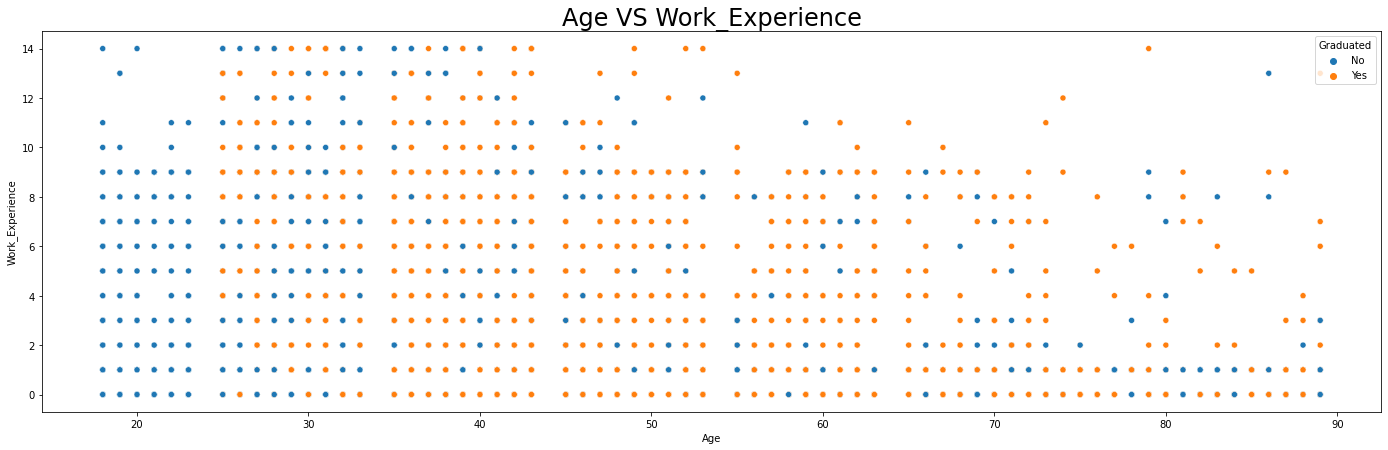

In [ ]:
plt.figure(figsize = (24,7))
p = sns.scatterplot(x = 'Age', y = 'Work_Experience', hue = 'Graduated', data = train)
p.set_title("Age VS Work_Experience", fontsize = 24)

- This Data is unrealistic as we have people with age that less than 30 years old have work experince more than 10 years though they are not graduated, On other hand people with age more than 40 years old have work epereince less than 3 years also some of them is not graduated.

- Age is often positively related to work experience, older workers may have acquired more job-relevant knowledge than younger workers.

- Ages (24, 34, 44, 54, 64) are missing.

Text(0.5, 1.0, 'Family_Size VS Spending Score')

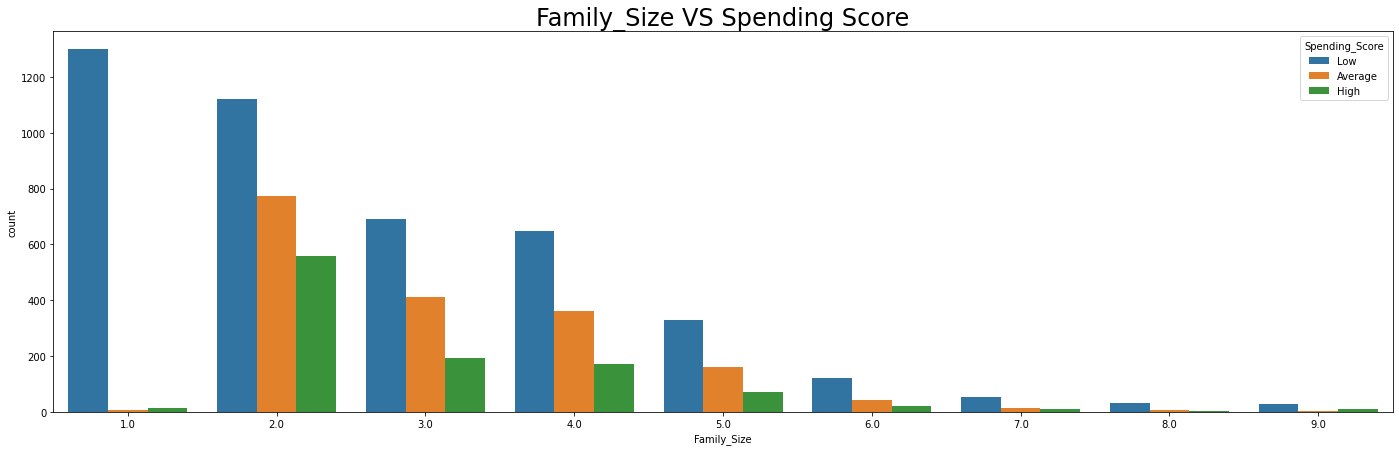

In [ ]:
plt.figure(figsize = (24,7))
p = sns.countplot(x = 'Family_Size', hue = 'Spending_Score', data = train, hue_order = ['Low', 'Average', 'High'])
p.set_title("Family_Size VS Spending Score", fontsize = 24)

- People who have small family size most of them the Spending_Score are low as we would expected, but those who have larger family size they also have low Spending Score. The Spending Score should increase by increasing the family size.

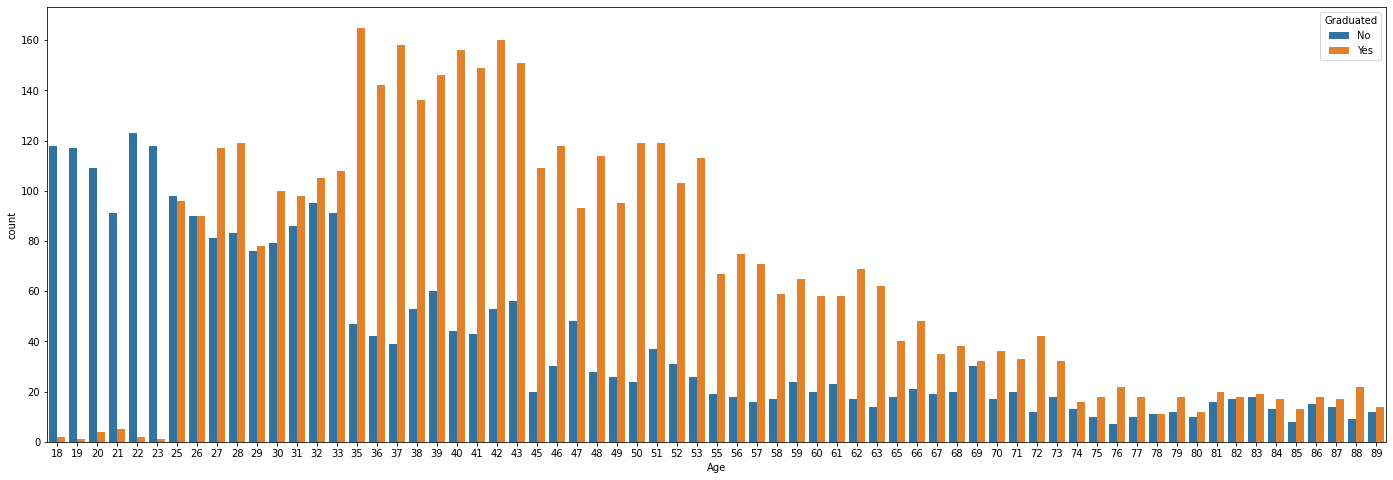

In [ ]:
plt.figure(figsize = (24,8))
sns.countplot(x = 'Age', hue = 'Graduated', data = train)

We have some people are graduated though there ages are less than 20 years old, on other hand some people are not graduated though there ages are more than 30

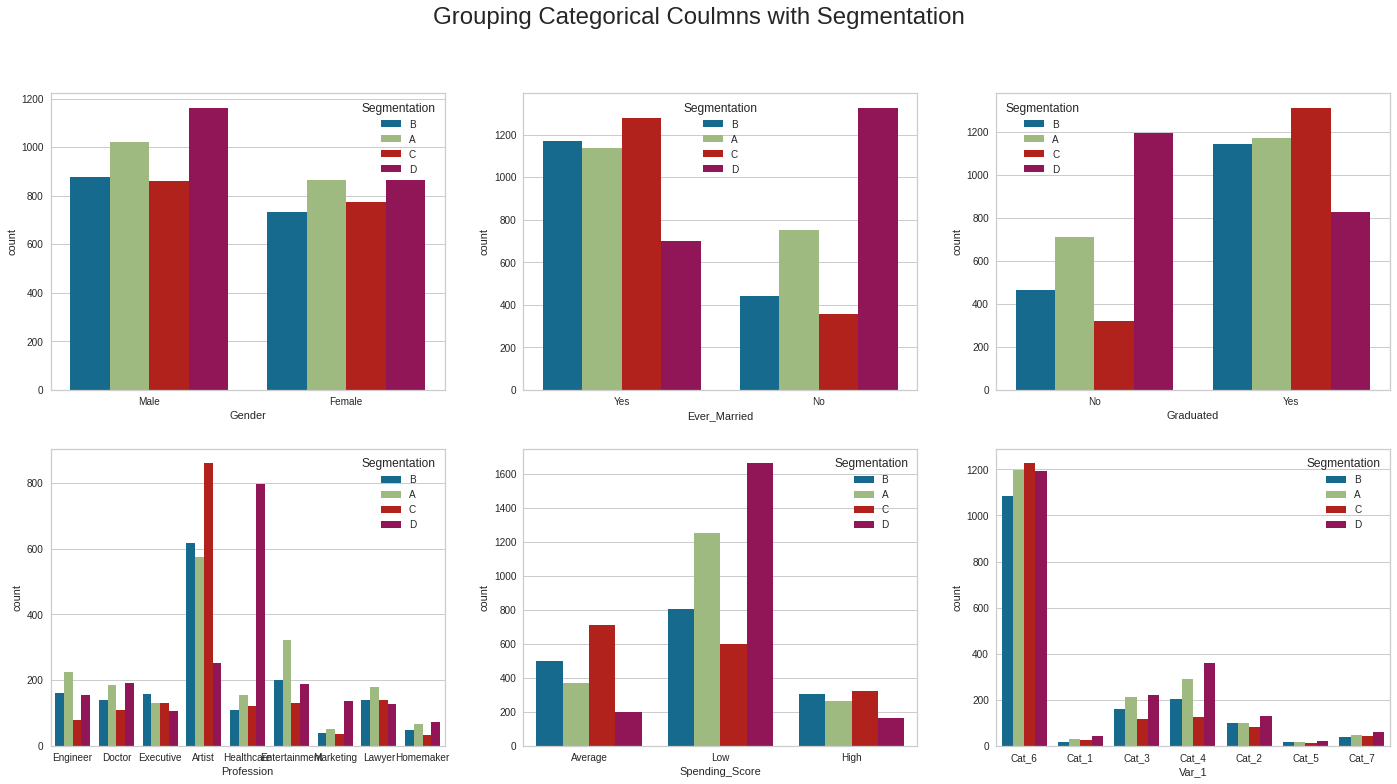

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(24,12))
fig.suptitle('Grouping Categorical Coulmns with Segmentation', fontsize = 24)

sns.countplot(x = 'Gender', hue = 'Segmentation', data = train, ax = ax[0,0])
sns.countplot(x = 'Ever_Married', hue = 'Segmentation', data = train, ax = ax[0,1])
sns.countplot(x = 'Graduated', hue = 'Segmentation', data = train, ax = ax[0,2])
sns.countplot(x = 'Profession', hue = 'Segmentation', data = train, ax = ax[1,0])
sns.countplot(x = 'Spending_Score', hue = 'Segmentation', data = train, ax = ax[1,1])
sns.countplot(x = 'Var_1', hue = 'Segmentation', data = train, ax = ax[1,2])

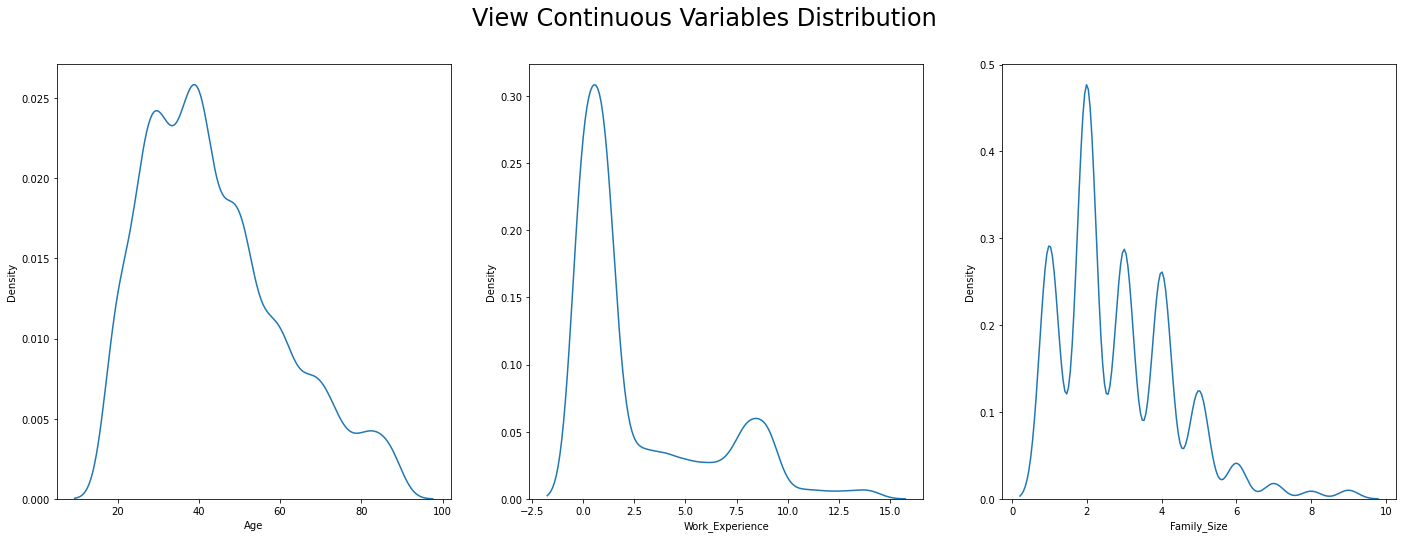

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(24,8))
fig.suptitle('View Continuous Variables Distribution', fontsize = 24)

sns.kdeplot(x = 'Age', data = train, ax = ax[0])
sns.kdeplot(x = 'Work_Experience', data = train, ax = ax[1])
sns.kdeplot(x = 'Family_Size', data = train, ax = ax[2])

- Age Column is moderate skewed to righ

- Work_Experience and Family_Size are highly skewed to right 

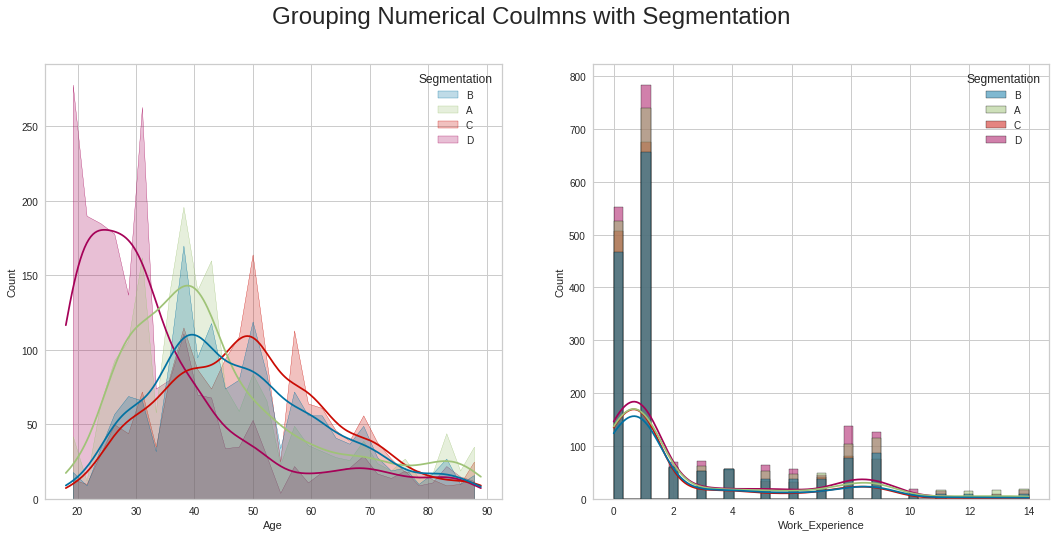

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,8))
fig.suptitle('Grouping Numerical Coulmns with Segmentation', fontsize = 24)

sns.histplot(x = 'Age', hue = 'Segmentation', data = train, kde = True, element = "poly", ax = ax[0])
sns.histplot(x = 'Work_Experience', hue = 'Segmentation', data = train, kde = True, ax = ax[1])

- Age Coulmn
  - Most People in Group A there ages ranges between 28-41

  - Most People in Group B there ages ranges between 35-45

  - Most People in Group C there ages ranges between 40-51

  - Most People in Group B there ages ranges between 20-31

- Work Experience Coulmn
  - Most People in all Groups there Experience ranges between 0-1 year

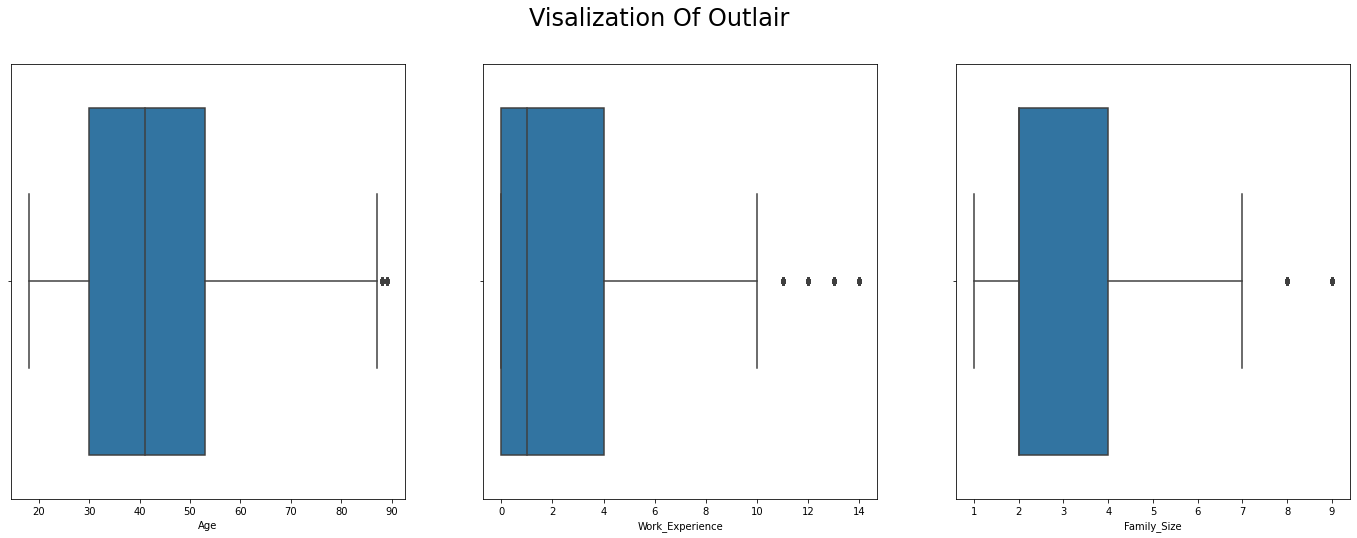

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(24,8))
fig.suptitle('Visalization Of Outlair', fontsize = 24)

sns.boxplot(data = train, x = 'Age', ax = ax[0])
sns.boxplot(data = train, x = 'Work_Experience', ax = ax[1])
sns.boxplot(data = train, x = 'Family_Size', ax = ax[2])

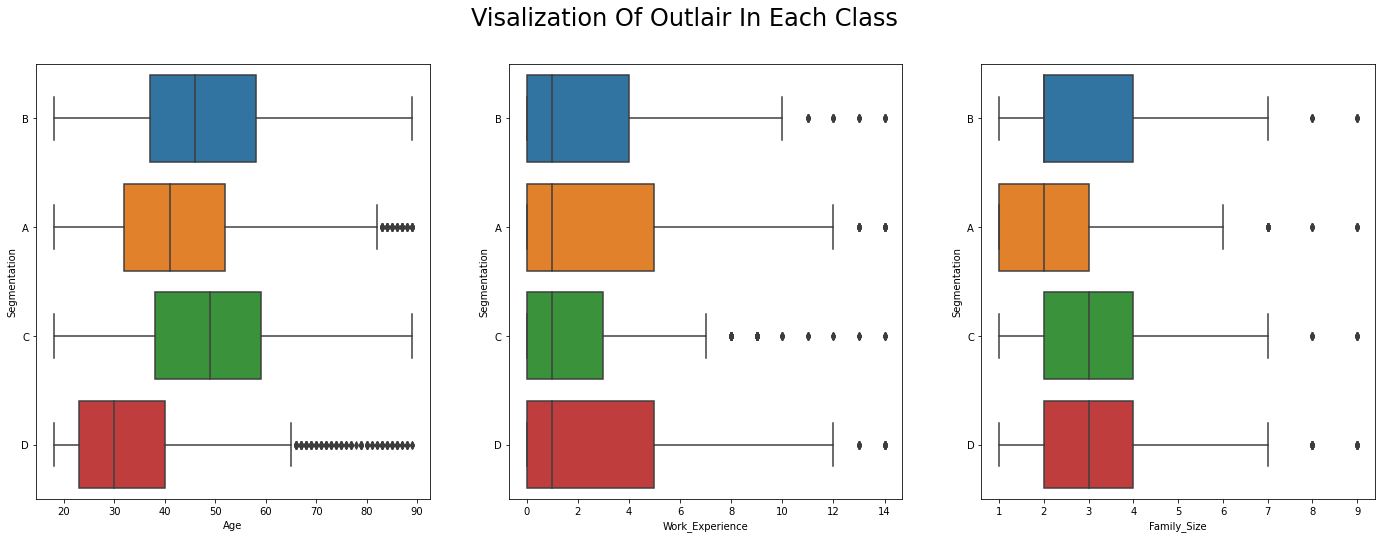

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(24,8))
fig.suptitle('Visalization Of Outlair In Each Class', fontsize = 24)

sns.boxplot(data = train, x = 'Age', y = 'Segmentation', ax = ax[0])
sns.boxplot(data = train, x = 'Work_Experience', y = 'Segmentation', ax = ax[1])
sns.boxplot(data = train, x = 'Family_Size', y = 'Segmentation', ax = ax[2])

# **Preprocessing**

In [ ]:
def one_hot_encoder(data):
  
  gender = pd.get_dummies(data["Gender"], drop_first=True)
  ever_Married = pd.get_dummies(data["Ever_Married"], drop_first = True)
  graduated = pd.get_dummies(data["Graduated"], drop_first=True)
  #We make "drop_first" to avoid dummy trap

  data = pd.concat([data, gender, ever_Married, graduated], axis=1)
  data = data.drop(columns=['Gender', 'Ever_Married', 'Graduated'], axis=1)

  return data

In [ ]:
def LabelEncoder(data):
  data['Var_1'] = data['Var_1'].replace({'Cat_6': 1, 'Cat_4': 2, 'Cat_3': 3, 'Cat_2': 4, 'Cat_7': 5, 'Cat_1': 6, 'Cat_5': 7})
  data['Profession'] = data['Profession'].replace(  {'Artist': 1, 'Healthcare': 2, 'Entertainment': 3, 'Engineer': 4, 'Doctor': 5,
                                                 'Lawyer': 6, 'Executive': 7, 'Marketing': 8, 'Homemaker': 9})
  data['Spending_Score'] = data['Spending_Score'].replace({'Low': 1, 'Average': 2, 'High': 3})

  return data

In [ ]:
def Drop_Columns(data):
  data = data.drop(['Cat_1', 'Cat_2', 'Cat_3', 'Cat_5', 'Cat_7'], axis = 1)
  
  return data

In [ ]:
def MergProfession(data):
  data.loc[data['Profession'].isin(['Engineer', 'Doctor', 'Executive', 'Marketing', 'Lawyer', 'Homemaker']), 'Profession'] = 'Other_Prof'

  return data

In [ ]:
def Merge_Var1(data):
  data.loc[data['Var_1'].isin(['Cat_1', 'Cat_2', 'Cat_3', 'Cat_5', 'Cat_7']), 'Var_1'] = 'Other_Var1'
  
  return data

In [ ]:
def RemoveOutLair(data):
  """index = train[((train['Age'] > 65) & (train['Segmentation'] == 'D')) |
                  ((train['Work_Experience'] > 10) & (train['Segmentation'] == 'A')) |
                  ((train['Work_Experience'] > 7) & (train['Segmentation'] == 'B')) |
                  ((train['Work_Experience'] > 5) & (train['Segmentation'] == 'C')) |
                  ((train['Work_Experience'] > 10) & (train['Segmentation'] == 'D')) |
                  ((train['Family_Size'] > 6) & (train['Segmentation'] == 'A')) |
                  ((train['Family_Size'] > 7) & (train['Segmentation'] == 'B')) |
                  ((train['Family_Size'] > 7) & (train['Segmentation'] == 'C')) |
                  ((train['Family_Size'] > 7) & (train['Segmentation'] == 'D')) 
              ].index
              
  data = data.drop(index = index, axis = 1)"""

  z_scores = zscore(data[['Age', 'Work_Experience', 'Family_Size']])
  abs_z_scores = np.abs(z_scores)
  filtered_entries = (abs_z_scores < 3).all(axis=1)
  data = data[filtered_entries]

  return data

In [ ]:
def Handel_Graduated(data):
  data.loc[(data['Age'] < 25), 'Graduated'] = 'No'
  data.loc[(data['Age'] > 28), 'Graduated'] = 'Yes'
  
  return data

In [ ]:
def ResetExp_Col(data):
  data.loc[data['Age'].isin(range(18, 24)), 'Work_Experience'] = [randint(0,4) for _ in data.loc[data['Age'].isin(range(18, 24)), 'Work_Experience'] ]
  data.loc[data['Age'].isin(range(25, 34)), 'Work_Experience'] = [randint(2,7) for _ in data.loc[data['Age'].isin(range(25, 34)), 'Work_Experience'] ]
  data.loc[data['Age'].isin(range(35, 54)), 'Work_Experience'] = [randint(5,10) for _ in data.loc[data['Age'].isin(range(35, 54)), 'Work_Experience'] ]
  data.loc[data['Age'].isin(range(55, 90)), 'Work_Experience'] = [randint(7,14) for _ in data.loc[data['Age'].isin(range(55, 90)), 'Work_Experience'] ]

  return data

In [ ]:
def Pipeline(data, listof_preprocessing_tech):
  for tech in listof_preprocessing_tech:
    data = tech(data)

  return data

In [ ]:
train = Pipeline(train, [ResetExp_Col, RemoveOutLair, LabelEncoder, one_hot_encoder])
train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

,Age,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Male,Yes,Yes
0,33,4,4.0,2,2.0,1,B,1,1,0
1,42,5,7.0,1,1.0,1,B,0,0,1
2,80,7,14.0,3,2.0,1,A,1,1,0
3,66,1,8.0,2,3.0,1,C,0,1,1
4,39,2,10.0,3,2.0,6,D,0,1,1
...,...,...,...,...,...,...,...,...,...,...
7160,42,1,9.0,2,5.0,1,C,1,1,1
7161,48,1,8.0,2,2.0,1,C,1,1,1
7162,51,1,5.0,2,2.0,1,C,0,1,1
7163,25,4,2.0,1,2.0,1,A,0,1,0


In [ ]:
test = Pipeline(test, [ResetExp_Col, LabelEncoder, one_hot_encoder])
test

,ID,Age,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Male,Yes,Yes
0,755,37,4,5.0,2,6.0,2,0,1,0
1,4670,21,2,3.0,1,3.0,1,0,0,0
2,287,38,1,9.0,1,1.0,1,1,0,1
3,1142,26,2,5.0,1,2.0,3,1,0,1
4,6583,68,6,12.0,1,2.0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
3525,4323,79,1,9.0,3,2.0,1,1,1,1
3526,3776,40,3,10.0,2,2.0,3,1,1,1
3527,6697,73,1,7.0,3,3.0,1,1,1,1
3528,3431,20,2,4.0,1,5.0,3,1,0,0


# **Feature Sealection**

In [ ]:
from sklearn.feature_selection import SelectKBest

fs = SelectKBest(k = 10)

X_selected = fs.fit_transform(X, y)

In [ ]:
cols = fs.get_support(indices=True)
features_df_new = X.iloc[:,cols]
features_df_new

,Age,Family_Size,Entertainment,Healthcare,High,Low,Cat_4,Cat_6,Yes,Yes
0,33,2.0,0,0,0,0,0,1,1,0
1,42,1.0,0,0,0,1,0,1,0,1
2,80,2.0,0,0,1,0,0,1,1,0
3,66,3.0,0,0,0,0,0,1,1,1
4,39,2.0,0,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
7160,42,5.0,0,0,0,0,0,1,1,1
7161,48,2.0,0,0,0,0,0,1,1,1
7162,51,2.0,0,0,0,0,0,1,1,1
7163,25,2.0,0,0,0,1,0,1,1,0


# **Splitting The Data into train and test**

In [ ]:
X = train.drop('Segmentation', axis = 1).values
y = train['Segmentation'].values

#X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size = 0.2, random_state = 42, stratify=train['Segmentation'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

# **Apply Logestic Rgression**

Apply Grid Search

In [ ]:
param = {
    "solver": ['newton-cg', 'lbfgs', 'liblinear'],
    "penalty": ['none', 'l1', 'l2', 'elasticnet'],
    "C": [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
}
cls_cv = GridSearchCV(LogisticRegression(max_iter = 1000), param, n_jobs=-1, cv=3)
cls_cv.fit(X_train, y_train)

cls_cv.best_estimator_

In [ ]:
model = LogisticRegression(C=1, max_iter=1000, penalty='l1', solver='liblinear', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
#confusion_matrix = confusion_matrix(y_test, y_pred)
#report = classification_report(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
acc

0.4265536723163842

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(confusion_matrix, annot=True, ax = ax)

# **Apply CatBoost Classification**

In [ ]:
model = CatBoostClassifier(silent = True, learning_rate = 0.01)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
#confusion_matrix = confusion_matrix(y_test, y_pred)
#report = classification_report(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
acc

0.4872881355932203

# **Apply XGBoost Classifier**

Apply GridSearchCV

In [ ]:
param = {
    "learning_rate": [0.1, 0.16 ,0.2, 0.01],
    "max_depth": [5, 7, 9, 11, 13],
}
cls_cv = GridSearchCV(XGBClassifier(), param, n_jobs=-1, cv=5)
cls_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.16, 0.2, 0.01],
                         'max_depth': [5, 7, 9, 11, 13]})

In [ ]:
cls_cv.best_estimator_

XGBClassifier(max_depth=5, objective='multi:softprob')

In [ ]:
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, y_pred)
acc

0.4795197740112994

# **Apply Random Forest Classifier**

Apply Grid Search

In [ ]:
param_grid = { 
    'n_estimators': [100, 200, 300, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3, 4, 6, 7, 8],
    'criterion' :['gini', 'entropy']
}

cls_cv = GridSearchCV(RandomForestClassifier(), param_grid, n_jobs=-1, cv=3)
cls_cv.fit(X_train, y_train)

cls_cv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=200)

In [ ]:
model = RandomForestClassifier(max_depth=7, max_features='sqrt', n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
acc

0.4922316384180791

Text(0.5, 1.0, 'Feature Importances')

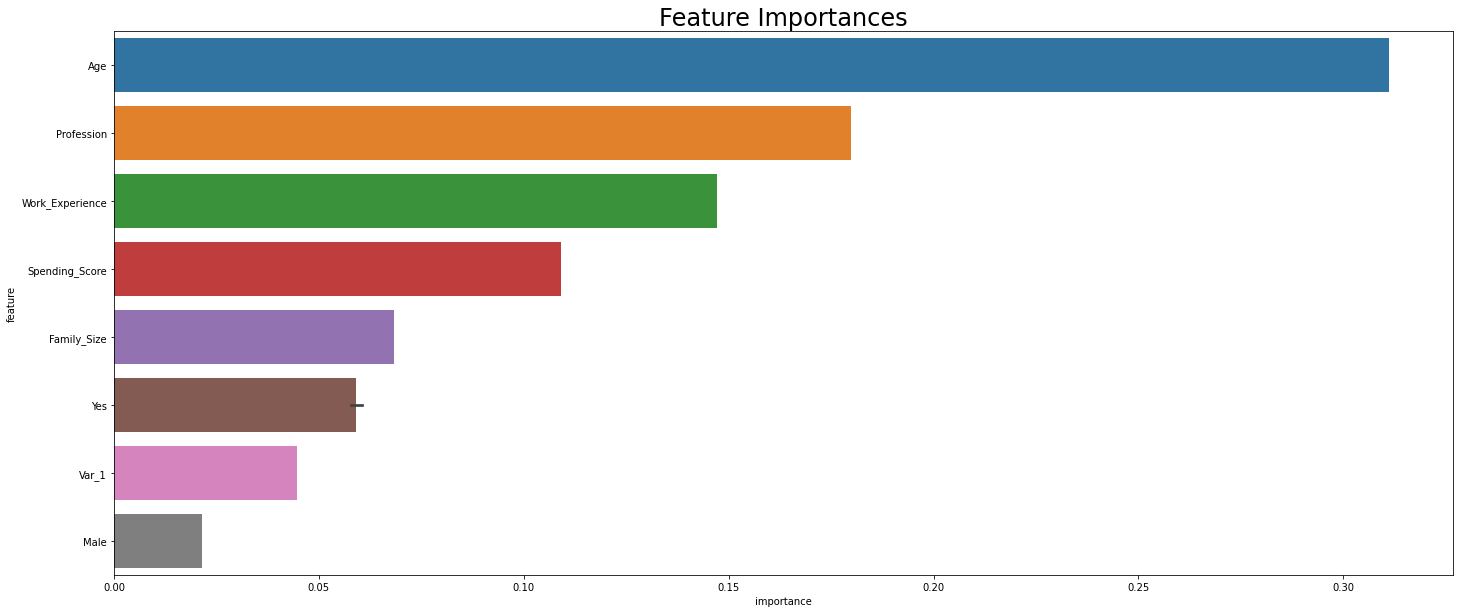

In [ ]:
X = train.drop('Segmentation', axis = 1)

feature_rank=pd.DataFrame({'feature':X.columns,'importance':model.feature_importances_})

feature_rank=feature_rank.sort_values('importance',ascending=False)
plt.figure(figsize=(24,10))
p = sns.barplot(y='feature',x='importance',data=feature_rank)
p.set_title('Feature Importances', fontsize = 24)

Print Confusion Matrix for Random Forest

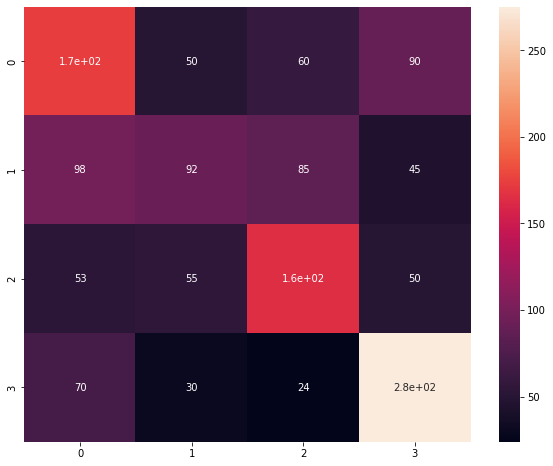

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(confusion_matrix, annot=True, ax = ax)

# **Apply Support Vector Classifier**

In [ ]:
model = SVC(kernel = 'rbf', C = 1.5, random_state = 42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
acc

0.4166666666666667

# **Apply LighGBM Classifier**

In [ ]:
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, y_pred)
acc

0.471045197740113

# **Apply Voting Classifier**

In [ ]:
clf1 = RandomForestClassifier(n_estimators = 200, max_depth=8, random_state=42)
clf2 = XGBClassifier(random_state=42)
clf3 = lgb.LGBMClassifier()
clf4 = CatBoostClassifier(silent = True)
clf5 = SVC()
clf6 = AdaBoostClassifier()

model = VotingClassifier(estimators=[('rf', clf1), ('xbg', clf2), ('light', clf3), ('svm', clf5), ('ada', clf6)], voting='hard')
model.fit(X_train, y_train)

#X_test = X_test.reshape((X_test.shape[0],1))
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

0.4830508474576271

# **Apply Stacking Classifer**

In [ ]:
clf1 = RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=200, random_state=42)
clf2 = XGBClassifier(random_state=42)
clf3 = lgb.LGBMClassifier()
clf4 = CatBoostClassifier(silent=True)
clf5 = SVC()
clf6 = AdaBoostClassifier()


model = StackingClassifier(estimators=[('rf', clf1), ('xbg', clf2), ('light', clf3), ('cat', clf4), ('svm', clf5), ('ada', clf6)], final_estimator= LogisticRegression(max_iter=2000), cv = 5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

0.4781073446327684

# **Decision Boundry For Random Forest**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

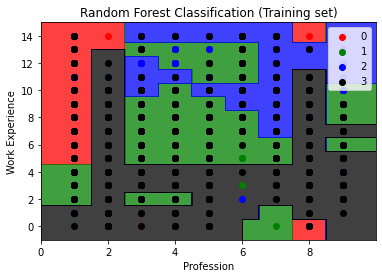

In [ ]:
from matplotlib.colors import ListedColormap


X_set, y_set = X_train[:, [1,2]], y_train
y_set = pd.factorize(y_set)[0].tolist()
trees = RandomForestClassifier(max_depth=7, max_features='sqrt', n_estimators=200, random_state=42)

trees.fit(X_set, y_set)

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, trees.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue', 'black')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue', 'black'))(i), label = j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('Profession')
plt.ylabel('Work Experience')
plt.legend()
plt.show()

# **Submission Test Data**

Train The model on the whole training set

In [ ]:
model.fit(X, y)

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=200,
                       random_state=42)

In [ ]:
model.score(X, y)

0.5310537334263782

Test The Model

In [ ]:
IDs = test['ID']
test_dataset = test.drop('ID', axis = 1)

y_pred_test = model.predict(test_dataset.values)

In [ ]:
submission = pd.DataFrame(IDs)
submission["Segmentation"] = y_pred_test
submission.to_csv("Submission.csv", index = False)